In [1]:
import numpy as np
from PIL import Image
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.losses import *
from tensorflow.keras.regularizers import *
from tensorflow.keras.initializers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.datasets import *
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.preprocessing.text import * # new
from tensorflow.keras.preprocessing.sequence import * #new
#import tensorflow_datasets as tfds

In [9]:
tokenizer = Tokenizer()
#data2 = 'Oh my god \n Becky, look at her butt \n Its so big \n She looks like one of those rap guys girlfriends \n But, you know \n Who understands those rap guys \n They only talk to her because she looks like a total prostitute, okay \n I mean her butt \n Its just so big \n I cant believe its so round \n Its like, out there \n I mean, its gross \n Look, shes just so black \n I like big butts and I cannot lie \n You other brothers cant deny \n That when a girl walks in with an itty bitty waist \n And a round thing in your face \n You get sprung \n Wanna pull up tough \n Cuz you notice that butt was stuffed \n Deep in the jeans shes wearing \n Im hooked and I cant stop staring \n Oh, baby I wanna get with ya \n And take your picture \n My homeboys tried to warn me \n But that butt you got \n Makes (Me so horny) \n Ooh, rump of smooth skin \n You say you wanna get in my Benz \n Well use me, use me cuz you aint that average groupie \n Ive seen them dancin \n To hell with romancin \n Shes sweat, wet \n Got it goin like a turbo Vette \n Im tired of magazines \n Saying flat butts are the thing \n Take the average black man and ask him that \n She gotta pack much back \n So, fellas! (Yeah), fellas (Yeah) \n Has your girlfriend got the butt? (Hell yeah) \n Tell em to shake it! (Shake it) Shake it, (Shake it) \n Shake that healthy butt \n Baby got back! \n (L.A. face with a Oakland booty) \n Baby got back! \n (L.A. face with a Oakland booty) \n (L.A. face with a Oakland booty) \n I like em round and big \n And when Im throwin a gig \n I just cant help myself \n Im actin like an animal \n Now heres my scandal \n I wanna get you home \n And ugh, double-up, ugh, ugh \n I aint talkin bout Playboy \n Cause silicone parts are made for toys \n I want em real thick and juicy \n So find that juicy double \n Mix-a-Lots in trouble \n Beggin for a piece of that bubble \n So Im lookin at rock videos \n Knock-kneeded bimbos walkin like hoes \n You can have them bimbos \n Ill keep my women like Flo Jo \n A word to the thick soul sistas, I wanna get with ya \n I wont cuss or hit ya \n But I gotta be straight when I say I wanna \n Til the break of dawn \n Baby got it goin on \n A lot of simps wont like this song \n Cause them punks like to hit it and quit it \n And Id rather stay and play \n Cause Im long, and Im strong \n And Im down to get the friction on \n So, ladies (Yeah), ladies (Yeah) \n If you wanna roll in my Mercedes (Yeah) \n Then turn around, stick it out \n Even white boys got to shout \n Baby got back \n Baby got back \n Yeah, baby, when it comes to females, Cosmo aint got nothin \n To do with my selection, Ha ha, only if shes \n So your girlfriend rolls a Honda \n Playin workout tapes by Fonda \n But Fonda aint got a motor in the back of her Honda \n My anaconda dont want none \n Unless youve got buns, hun \n You can do side bends or sit-ups \n But please dont lose that butt \n Some brothers wanna play that hard role \n And tell you that the butt aint gold \n So they toss it and leave it \n And I pull up quick to retrieve it  \n So Cosmo says youre fat \n Well I aint down with that \n Cause your waist is small and your curves are kickin \n And Im thinkin bout stickin \n To the beanpole dames in the magazines \n You aint it, Miss Thing \n Give me a sista, I cant resist her \n Red beans and rice didnt miss her \n Some knucklehead tried to diss \n Cause his girls are on my list \n He had game but he chose to hit em \n And I pull up quick to get wit em  \n So ladies, if the butt is round \n And you want a triple X throw down \n Dial MIXALOT \n And kick them nasty thoughts \n Baby got back \n Baby got back \n (Little in the middle but she got much back) \n (Little in the middle but she got much back) \n (Little in the middle but she got much back) \n (Little in the middle but she got much back)'
file = open(r'C:\Users\44788\Desktop\OctaveML\lyrics_corpus.txt')
data = file.read()
file.close()

In [12]:
corpus = data.lower().split("\n")


In [13]:
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index)+1

In [14]:
# take this corpus and turn it into training data
input_sequence = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequence.append(n_gram_sequence)
# creates a sequential list of of the lines in the song, and for each line
# a list of lists containing increasing number of ordered words from that line

In [15]:
max_sequence_len = max([len(x) for x in input_sequence])

In [16]:
# pad all input sequences so that they are all of the same length 
pad_input_sequences = np.array(pad_sequences(input_sequence,
                                        maxlen = max_sequence_len,
                                        padding='pre'))

In [17]:
pad_input_sequences

array([[   0,    0,    0, ...,    0,   51,   12],
       [   0,    0,    0, ...,   51,   12,   96],
       [   0,    0,    0, ...,   12,   96, 1217],
       ...,
       [   0,    0,    0, ...,    0,   47,  105],
       [   0,    0,    0, ...,   47,  105,  138],
       [   0,    0,    0, ...,  105,  138,  184]])

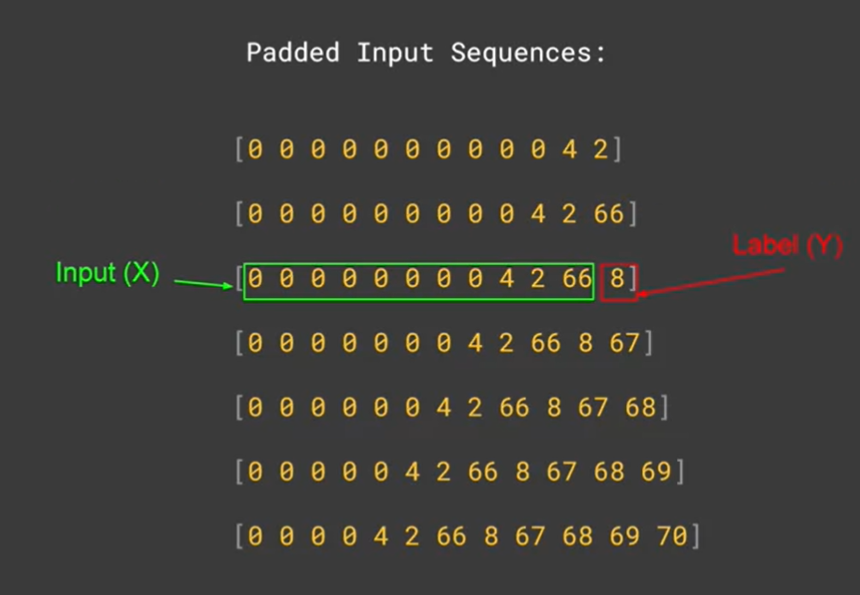

In [24]:
Image.open(r'C:\Users\44788/Desktop\it4.png')

In [18]:
# now split the xs and ys
xs = pad_input_sequences[:,:-1]
ys = pad_input_sequences[:,-1]

In [19]:
# now one_hot encode labels as this is a classification problem 
ys = tf.keras.utils.to_categorical(ys, num_classes=total_words)

In [22]:
model = Sequential([
    Embedding(total_words, 128, input_length=max_sequence_len-1),
    Bidirectional(LSTM(128)),
    Dense(total_words, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')
history = model.fit(xs,ys,epochs=50, verbose=1)

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
377/377 [==============================] - 8s 14ms/step - loss: 6.9269 - accuracy: 0.0639
Epoch 2/50
377/377 [==============================] - 5s 14ms/step - loss: 6.2183 - accuracy: 0.0729
Epoch 3/50
377/377 [==============================] - 5s 14ms/step - loss: 5.9512 - accuracy: 0.0815
Epoch 4/50
377/377 [==============================] - 5s 14ms/step - loss: 

<AxesSubplot:>

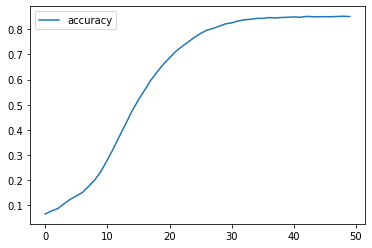

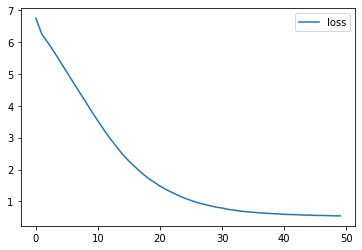

In [24]:
df = pd.DataFrame(history.history)
df.plot(y=['accuracy'])
df.plot(y=['loss'])

In [29]:
seed_text = 'whats going to happen'
next_words = 100
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences((seed_text))[0]
    token_list = pad_sequences([token_list],
                               maxlen = max_sequence_len,
                               padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

whats going to happen a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a
